In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import os
import matplotlib.pyplot as plt
import json

# Data cleaning

In [88]:
foldernames = [
    './TRAININGS/items-07_07_2022__19:58:42',
]
labels = ['cushman']
dfs = []
dfs_with_unclear = []

dataset = json.load(open('data/cushman_2006/items.json'))
dataset = pd.DataFrame(dataset)
for label, foldername in zip(labels, foldernames):
    df = pd.read_csv(open(foldername+'/results.csv', 'r'))
    df['exp'] = label
    df['a'] = df['a'].str.lower()
    df = df[df['q_id']==0]
    df = df[~df['item_id'].isin([1, 2])]
    for i in df['item_id'].unique():
        if i not in (1, 2):

            df.loc[df['item_id']==i, 'title'] = \
                str(dataset[dataset['id']==i]['title'].unique()[0])[2:]
            df.loc[df['item_id']==i, 'cond'] = \
                str(dataset[dataset['id']==i]['title'].unique()[0])[:2]

    df['principle'] = ''
    df['principle'] = df['principle'].astype('object')
    df.loc[df['cond'].str.contains('ik|ci|fk|cf'), 'principle'] += ' action '
    df.loc[df['cond'].str.contains('l'), 'principle'] += ' inaction '
    df.loc[df['cond'].str.contains('f'), 'principle'] += ' foreseen '
    df.loc[df['cond'].str.contains('i'), 'principle'] += ' intended '
    df.loc[df['cond'].str.contains('c'), 'principle'] += ' contact '
    df.loc[~df['cond'].str.contains('c'), 'principle'] += ' no_contact '
    df['yes'] = df['a'].str.contains(pat=r'\b(yes)\b', regex=True)
    df['no'] = df['a'].str.contains(pat=r'\b(no)\b', regex=True)
    df['unclear'] = df['yes'] == df['no']
    df['val'] = None
    df.loc[df['yes']==1, 'val'] = 'yes'
    df.loc[df['no']==1, 'val'] = 'no'
    df.loc[df['unclear']==1, 'val'] = 'unclear'
    dfs_with_unclear.append(df.copy())
    df = df[df['unclear']!=1] 
    dfs.append(df.copy())
    
df = pd.concat(dfs)
df_with_unclear = pd.concat(dfs_with_unclear)

def mean_by_exp_and_sub(df):
    # set cond label and merge 
    exp = df['exp'].unique()
    dfs = []
    for e in exp:
        d = df[df['exp']==e].groupby(['title', 'principle' ], as_index=False).mean()
        d['exp'] = e
        dfs.append(d.copy())

    df2 = pd.concat(dfs)
    return df2

df2 = mean_by_exp_and_sub(df)
df2_with_unclear = mean_by_exp_and_sub(df_with_unclear)

    
df[df['val']=='unclear'].to_excel(foldername[0] + '/unclear.xlsx')

print('unclear proportion: ', np.mean(df_with_unclear['unclear']==1))

df2


unclear proportion:  0.185


/tmp/ipykernel_1373445/1101216729.py:32: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['yes'] = df['a'].str.contains(pat=r'\b(yes)\b', regex=True)
/tmp/ipykernel_1373445/1101216729.py:33: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['no'] = df['a'].str.contains(pat=r'\b(no)\b', regex=True)


,title,principle,Unnamed: 0,item_id,q_id,iter,a_id,yes,no,unclear,exp
0,Aqua,action foreseen contact,98.875000,3.0,0.0,9.437500,0.0,1.000000,0.000000,0.0,cushman
1,Aqua,action foreseen no_contact,140.941176,4.0,0.0,10.470588,0.0,1.000000,0.000000,0.0,cushman
2,Boat,action foreseen no_contact,977.647059,25.0,0.0,8.823529,0.0,1.000000,0.000000,0.0,cushman
3,Boat,inaction foreseen no_contact,1021.000000,26.0,0.0,10.500000,0.0,0.375000,0.625000,0.0,cushman
4,Boxcar,action foreseen no_contact,180.470588,5.0,0.0,10.235294,0.0,1.000000,0.000000,0.0,cushman
5,Boxcar,action intended contact,259.764706,7.0,0.0,9.882353,0.0,0.882353,0.117647,0.0,cushman
6,Boxcar,action intended no_contact,218.235294,6.0,0.0,9.117647,0.0,1.000000,0.000000,0.0,cushman
7,Boxcar,inaction intended no_contact,297.875000,8.0,0.0,8.937500,0.0,0.625000,0.375000,0.0,cushman
8,Burn,action foreseen contact,699.000000,18.0,0.0,9.500000,0.0,1.000000,0.000000,0.0,cushman
9,Burn,action foreseen no_contact,619.000000,16.0,0.0,9.500000,0.0,1.000000,0.000000,0.0,cushman


# Fig 1

In [226]:
d = []
pairs = [('action', 'inaction'), ('intended', 'foreseen'), ('contact', 'no_contact')]
labels = ('action', 'intention', 'contact')
titles = [
    ('Boxcar', 'Pond', 'Ship', 'Car', 'Boat', 'Switch'),
    ('Speed', 'Burn', 'Boxcar', 'Switch', 'Chem', 'Shark'),
    ('Speed', 'Boxcar', 'Aqua', 'Rubble')
]
for p,l,t1 in zip(pairs, labels, titles):
    for t in t1:
        d.append({
            'principle': p[0],
            'Item': t,
            'yes': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[0] + ' ')), 'yes'].mean()
        })
        d.append({
               'principle': p[1],
               'Item': t,
               'yes': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[1] + ' ')), 'yes'].mean()
        })


new_df = pd.DataFrame(d)
new_df

d = []

for p,l,t1 in zip(pairs, labels, titles):
    for t in t1:
        d.append(
            {
                'principle': p[0],    
                'item': t,
                'replicates': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[1] + ' ')), 'yes'].mean() >\
                            df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[0] + ' ')), 'yes'].mean()

            }
        )
df_table = pd.DataFrame(d)
df_table.loc[df_table['principle'] == 'intended', 'principle'] = 'intention'
print(df_table)

    principle    item  replicates
0      action  Boxcar       False
1      action    Pond       False
2      action    Ship       False
3      action     Car       False
4      action    Boat       False
5      action  Switch       False
6   intention   Speed        True
7   intention    Burn        True
8   intention  Boxcar        True
9   intention  Switch        True
10  intention    Chem       False
11  intention   Shark        True
12    contact   Speed        True
13    contact  Boxcar       False
14    contact    Aqua       False
15    contact  Rubble       False


Text(0, 0.5, 'Endorsement')

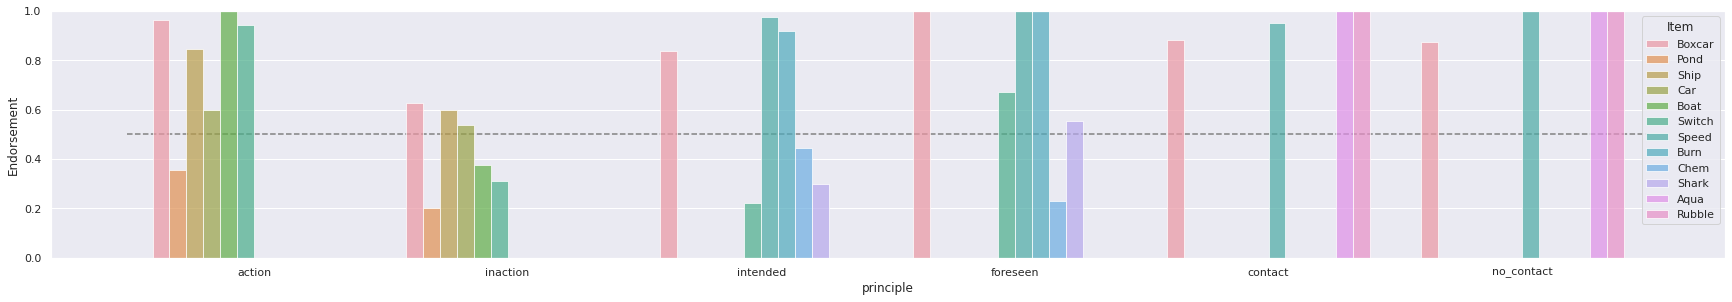

In [227]:
sns.set(rc={'figure.figsize':(30,10)})

plt.subplot(2,1,1)
sns.barplot(x='principle', y='yes', hue='Item', data=new_df, alpha=.7, zorder=1, ci=.68)
# sns.stripplot(x='title', y='yes', hue='cond', data=df, size=10, linewidth=1.2, zorder=2, edgecolor='white', jitter=True)
# sns.pointplot(x='title', y='yes', huedata=df, color='black',  join=False, ci=68, linewidth=1, edgecolor='white', capsize=0, zorder=3, scale=0)
# raincloud(x='exp', y='yes', markersize=9, df=df2)
x_lim = plt.gca().get_xlim()
plt.plot(x_lim, [.5, .5], ls='--', color='gray', zorder=0)
plt.ylim(0,1)
# plt.xlabel('item')
plt.ylabel('Endorsement')



In [228]:

def f(s, v, props): return np.where(s.isin([v]), props, '')
s = df_table.style
df_table.loc[df_table['replicates']==True, 'replicates'] = '✅'
df_table.loc[df_table['replicates']==False, 'replicates'] = '❌'

df_table
# s.apply(f, v=True, props="color: lightgreen;", axis=0)\
# .apply(f, v=False, props="color: white; background-color:pink", axis=0)
# df_table.style.apply(f, v=False, props="color:lightred;", axis=0)

,principle,item,replicates
0,action,Boxcar,❌
1,action,Pond,❌
2,action,Ship,❌
3,action,Car,❌
4,action,Boat,❌
5,action,Switch,❌
6,intention,Speed,✅
7,intention,Burn,✅
8,intention,Boxcar,✅
9,intention,Switch,✅


In [ ]:
d = []
pairs = [('action', 'inaction'), ('intended', 'foreseen'), ('contact', 'no_contact')]
labels = ('action', 'intention', 'contact')
titles = [
    ('Boxcar', 'Pond', 'Ship', 'Car', 'Boat', 'Switch'),
    ('Speed', 'Burn', 'Boxcar', 'Switch', 'Chem', 'Shark'),
    ('Speed', 'Boxcar', 'Aqua', 'Rubble')
]
for p,l,t1 in zip(pairs, labels, titles):
    for t in t1:
        d.append({
            'principle': p[0],
            'Item': t,
            'yes': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[0] + ' ')), 'yes'].mean()
        })
        d.append({
               'principle': p[1],
               'Item': t,
               'yes': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[1] + ' ')), 'yes'].mean()
        })


new_df = pd.DataFrame(d)
new_df

d = []

for p,l,t1 in zip(pairs, labels, titles):
    for t in t1:
        d.append(
            {
                'principle': p[0],    
                'item': t,
                'replicates': df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[1] + ' ')), 'yes'].mean() >\
                            df2.loc[(df2['title'] == t) * (df2['principle'].str.contains(' ' + p[0] + ' ')), 'yes'].mean()

            }
        )
df_table = pd.DataFrame(d)
df_table.loc[df_table['principle'] == 'intended', 'principle'] = 'intention'
print(df_table)

    principle    item  replicates
0      action  Boxcar       False
1      action    Pond       False
2      action    Ship       False
3      action     Car       False
4      action    Boat       False
5      action  Switch       False
6   intention   Speed        True
7   intention    Burn        True
8   intention  Boxcar        True
9   intention  Switch        True
10  intention    Chem       False
11  intention   Shark        True
12    contact   Speed        True
13    contact  Boxcar       False
14    contact    Aqua       False
15    contact  Rubble       False
